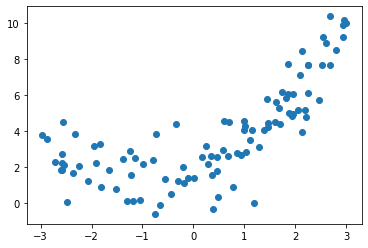

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(-3, 3, size = 100) #-3到3之间随机取100个值
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 +np.random.normal(0, 1, size=100)

plt.scatter(x, y)
plt.show()

#### 使用线性回归

0.4885652149121774


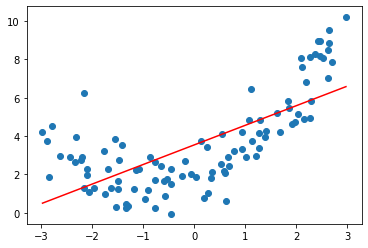

In [2]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.score(X, y))

y_predict = lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)],color='r')
plt.show()  #明显欠拟合

#### 用均方误差进行衡量

In [3]:
from sklearn.metrics import mean_squared_error

y_predict = lin_reg.predict(X)
mean_squared_error(y, y_predict) #方差较大

3.1163732215255897

#### 使用多项式回归

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def PolynomialRegression(degress):
    return Pipeline([
        ("PolynomialFeatures", PolynomialFeatures(degree= degress)),
        ("StandardScaler", StandardScaler()),
        ("LinearRegression", LinearRegression())
    ])
poly_reg = PolynomialRegression(degress = 2)
poly_reg.fit(X, y)

Pipeline(memory=None,
         steps=[('PolynomialFeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('LinearRegression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [6]:
y2_predict = poly_reg.predict(X)
mean_squared_error(y, y2_predict) #方差很小

1.1144339150078808

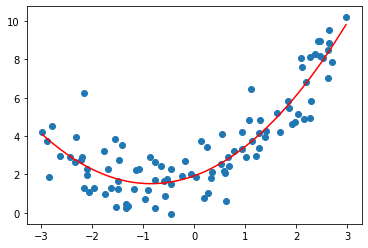

In [7]:
plt.scatter(x, y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)],color='r')
plt.show() 

1.0794538929975668


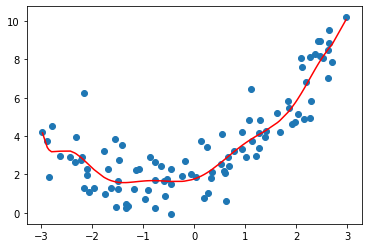

In [8]:
#当degress=10时
poly_reg = PolynomialRegression(degress=10)
poly_reg.fit(X, y)
y10_predict = poly_reg.predict(X)
print(mean_squared_error(y, y10_predict)) #方差更小
plt.scatter(x, y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)],color='r')
plt.show() 

0.7296718384473597


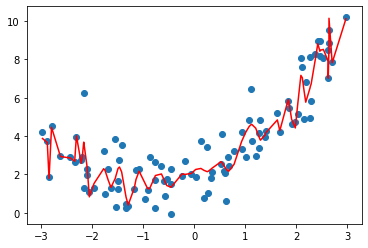

In [9]:
#当degress=100时，这是过拟合情况
poly_reg = PolynomialRegression(degress=100)
poly_reg.fit(X, y)
y100_predict = poly_reg.predict(X)
print(mean_squared_error(y, y100_predict)) 

plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)],color='r')
plt.show() 